In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('D:/HuaweiMoveData/Users/zero/Desktop/train.csv')
test = pd.read_csv('D:/HuaweiMoveData/Users/zero/Desktop/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 对缺失字段’Age’处理

In [6]:
train.isnull().sum()#有一些数据是具有缺失值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print('Percent of missing "Cabin" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 19.87%


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

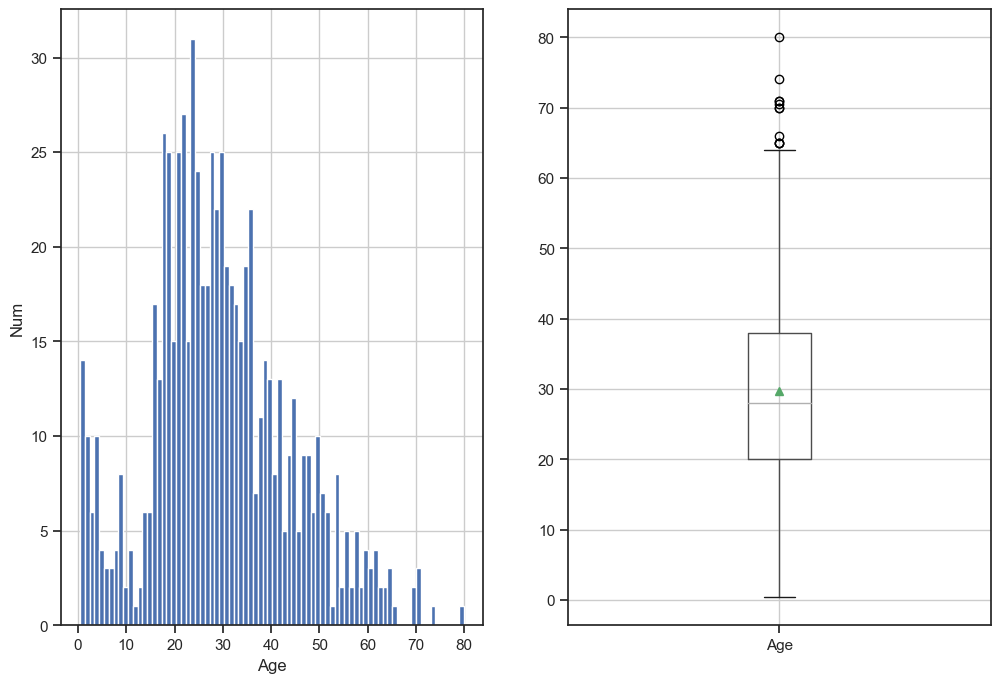

In [8]:
sns.set()
sns.set_style('ticks')

# 缺失值处理：年龄Age字段
train_age=train[train['Age'].notnull()]

# 年龄数据的分布情况
plt.figure(figsize=(12,8))

plt.subplot(121)
train_age['Age'].hist(bins=80)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_age.boxplot(column='Age',showfliers=True,showmeans=True)

train_age['Age'].describe()

In [9]:
# 要对缺失值处理,将其他Age数据的平均值来填补缺失值
train['Age']=train['Age'].fillna(train['Age'].mean())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 对缺失字段’Cabin’处理

In [10]:
print('Percent of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [11]:
train.drop(['Cabin'],axis=1,inplace=True)# 缺失率过高，删去Cabin的那一列数据

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# 对缺失字段’Embarked’处理

In [13]:
print('Percent of missing "Embarked" records is %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


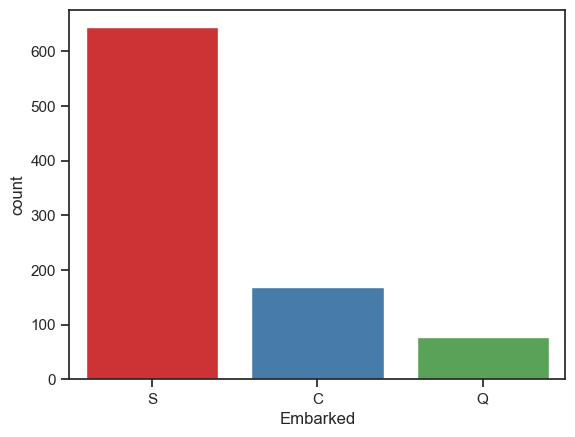

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
sns.countplot(x='Embarked',data=train,palette='Set1')
plt.show()
train['Embarked'].value_counts()

In [15]:
train.Embarked = train.Embarked.fillna('S')#用’S'填补缺失值

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# 数据分析 (对各个字段的分析，看看每个属性与最后的Survived有什么关系)

<Axes: ylabel='count'>

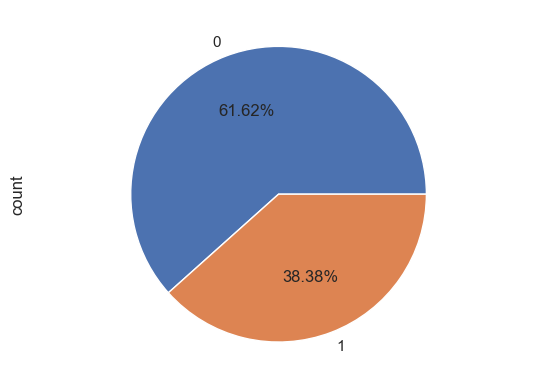

In [17]:
train_survived=train[train['Survived'].notnull()]

# 用seaborn绘制饼图，分析已知存活数据中的存活比例
sns.set_style('ticks') # 十字叉
plt.axis('equal')       #行宽相同
train_survived['Survived'].value_counts().plot.pie(autopct='%1.2f%%')

女性存活率74.20%,男性存活率18.89%


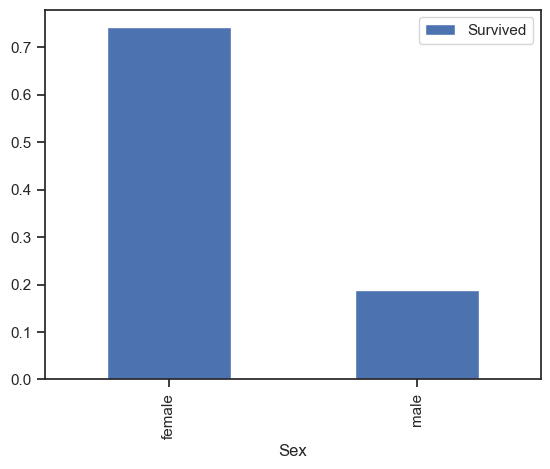

In [18]:
# 男性和女性存活情况
train[['Sex','Survived']].groupby('Sex').mean().plot.bar()

survive_sex=train.groupby(['Sex','Survived'])['Survived'].count()

print('女性存活率%.2f%%,男性存活率%.2f%%' %
     (survive_sex.loc['female',1]/survive_sex.loc['female'].sum()*100,
      survive_sex.loc['male',1]/survive_sex.loc['male'].sum()*100)
     )

Sex       female  male
Survived              
0             81   468
1            233   109


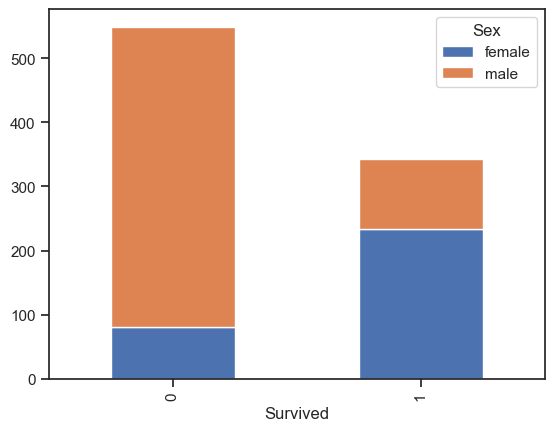

In [19]:
# 查看survived 与 Sex的关系
Survived_Sex = train['Sex'].groupby(train['Survived'])
print(Survived_Sex.value_counts().unstack())

Survived_Sex.value_counts().unstack().plot(kind = 'bar', stacked = True)
plt.show()

<Axes: xlabel='Age', ylabel='Survived'>

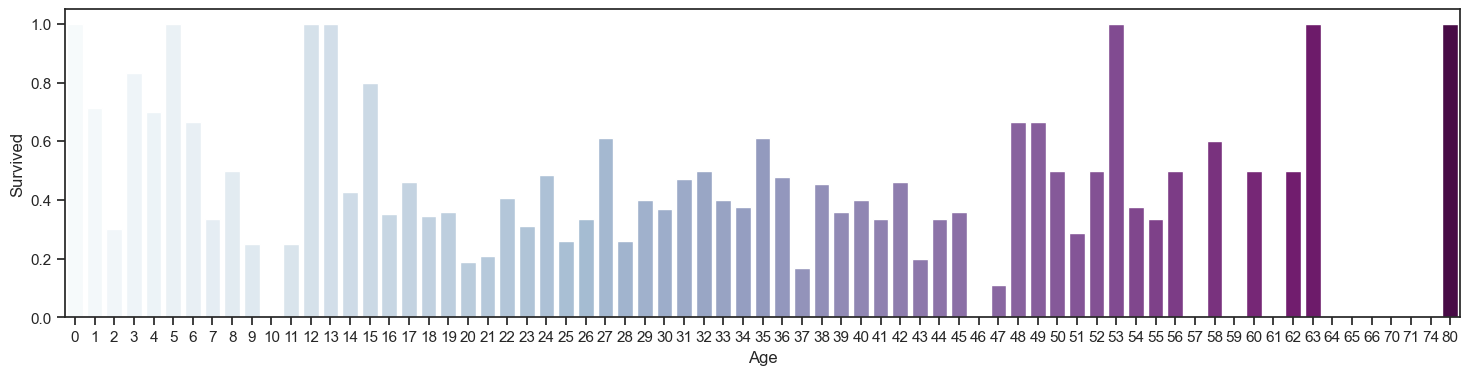

In [20]:
# 粗略的得出了Age与Survived的关系
plt.figure(figsize=(18,4))
train_age['Age']=train_age['Age'].astype(np.int_)
average_age=train_age[['Age','Survived']].groupby('Age',as_index=False).mean()

sns.barplot(x='Age',y='Survived',data=average_age,palette='BuPu')

<Axes: xlabel='family_size'>

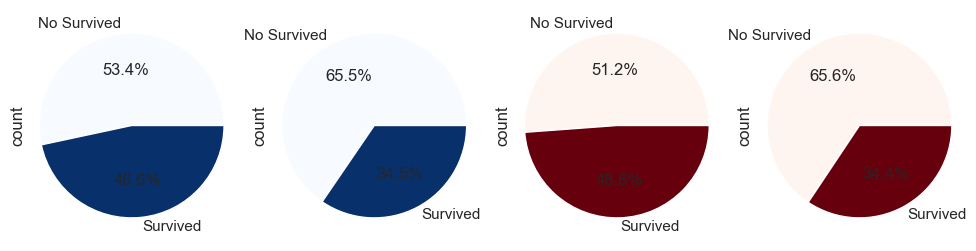

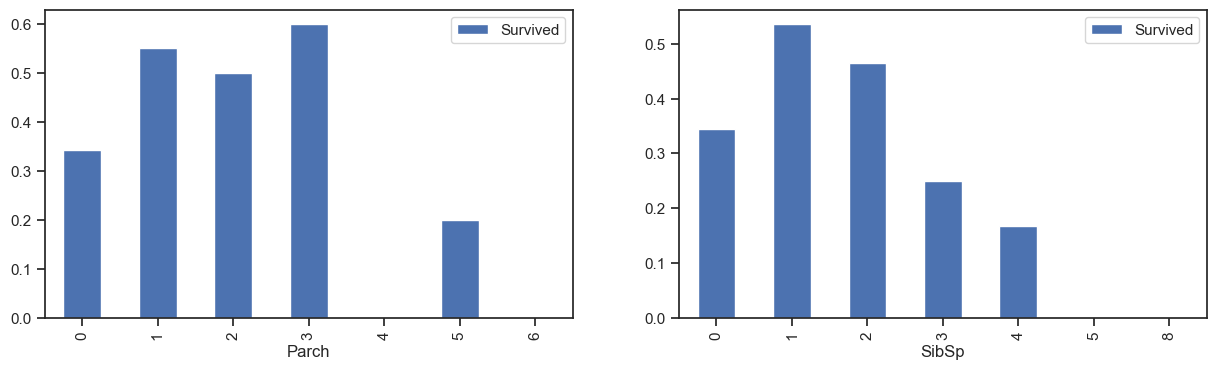

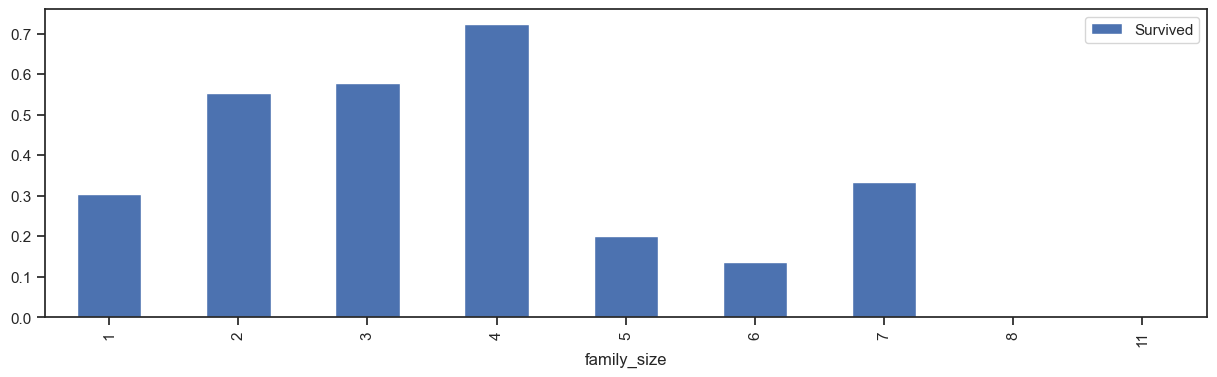

In [21]:
# 筛选出有无兄弟姐妹
sibsp_df = train[train['SibSp']!=0] # 有兄弟姐妹
no_sibsp_df = train[train['SibSp']==0] # 没有兄弟姐妹

# 筛选处有无父母子女
parch_df = train[train['Parch']!=0] # 有父母子女
no_parch_df = train[train['Parch']==0] # 没有父母

plt.figure(figsize=(12,3))
plt.subplot(141)
plt.axis('equal')
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Blues')

plt.subplot(142)
plt.axis('equal')
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Blues')


plt.subplot(143)
plt.axis('equal')
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Reds')

plt.subplot(144)
plt.axis('equal')
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct='%1.1f%%',colormap='Reds')
     

# 亲戚多少与是否存活有关吗？
fig,ax=plt.subplots(1,2,figsize=(15,4))
train[['Parch','Survived']].groupby('Parch').mean().plot.bar(ax=ax[0])
train[['SibSp','Survived']].groupby('SibSp').mean().plot.bar(ax=ax[1])

train['family_size']=train['Parch']+train['SibSp']+1
train[['family_size','Survived']].groupby('family_size').mean().plot.bar(figsize=(15,4))

<Axes: xlabel='Pclass'>

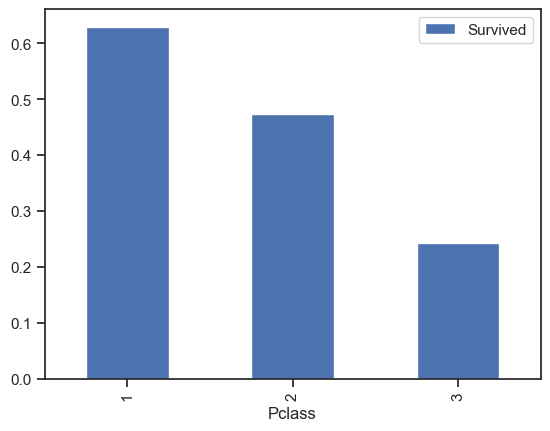

In [22]:
train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


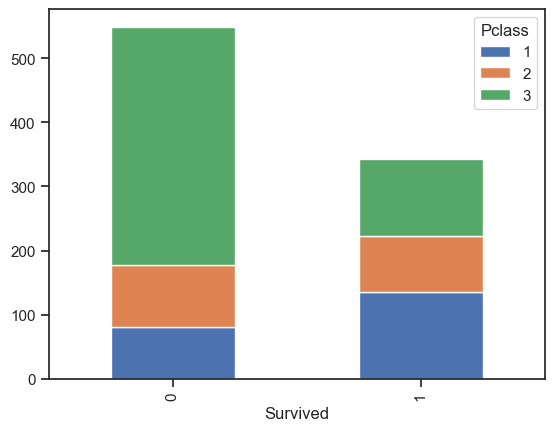

In [23]:
# 查看Survived 与 Pclass的关系
Survived_Pclass = train['Pclass'].groupby(train['Survived'])
print(Survived_Pclass.value_counts().unstack())

Survived_Pclass.value_counts().unstack().plot(kind = 'bar', stacked = True)
plt.show()

<Axes: >

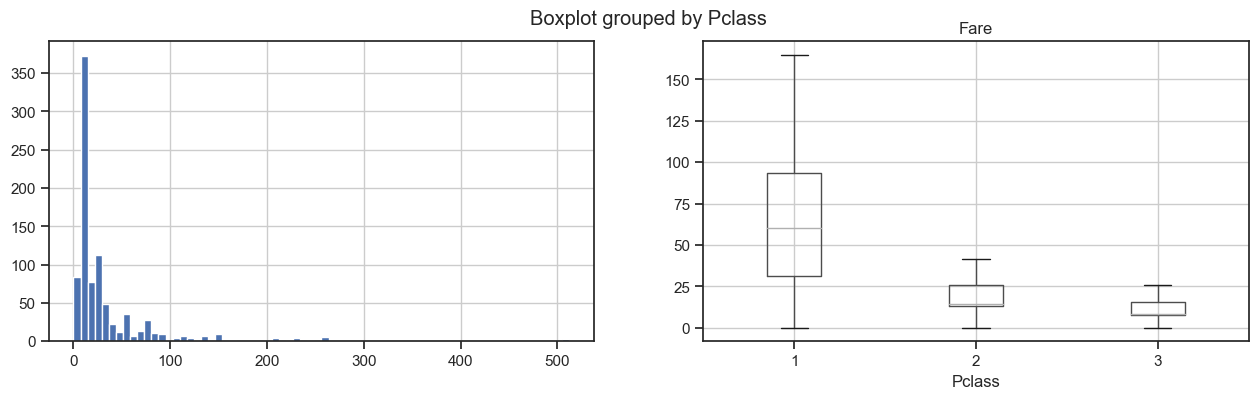

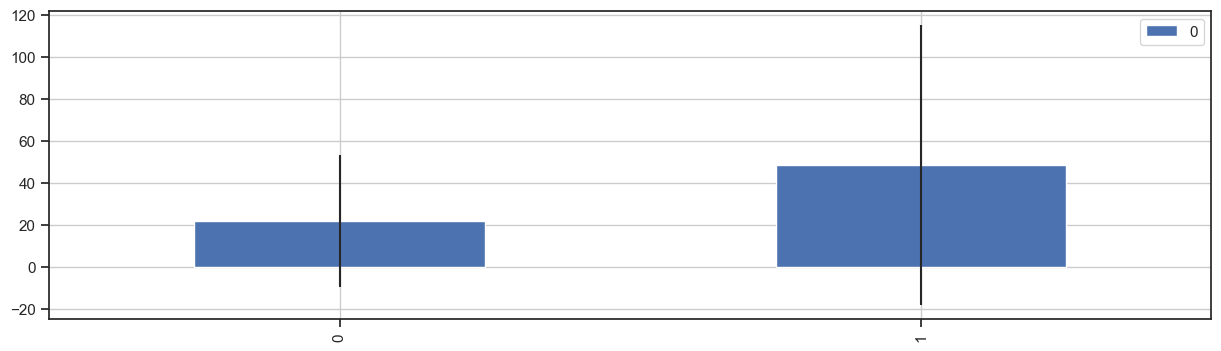

In [24]:
#Fare与Survived关系
fig,ax=plt.subplots(1,2,figsize=(15,4))
train['Fare'].hist(bins=70,ax=ax[0])
train.boxplot(column='Fare',by='Pclass',showfliers=False,ax=ax[1])

fare_not_survived=train['Fare'][train['Survived']==0]
fare_survived=train['Fare'][train['Survived']==1]
# 筛选数据

average_fare=pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare=pd.DataFrame([fare_not_survived.std(),fare_survived.std()])

average_fare.plot(yerr=std_fare,kind='bar',figsize=(15,4),grid=True)

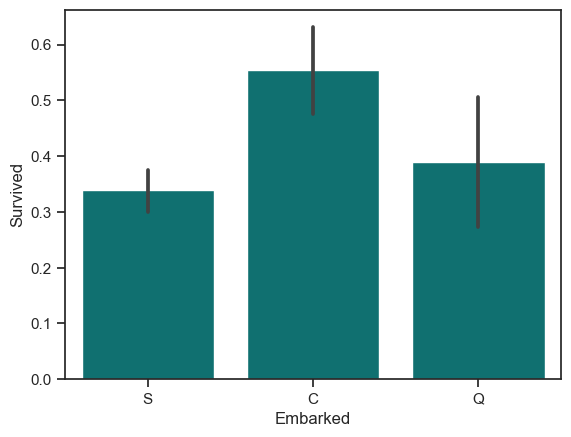

In [25]:
sns.barplot(x='Embarked', y='Survived', data=train, color="teal")
plt.show()

# 总体结合分析

Text(0.5, 1.0, 'Sex and Age vs Survived')

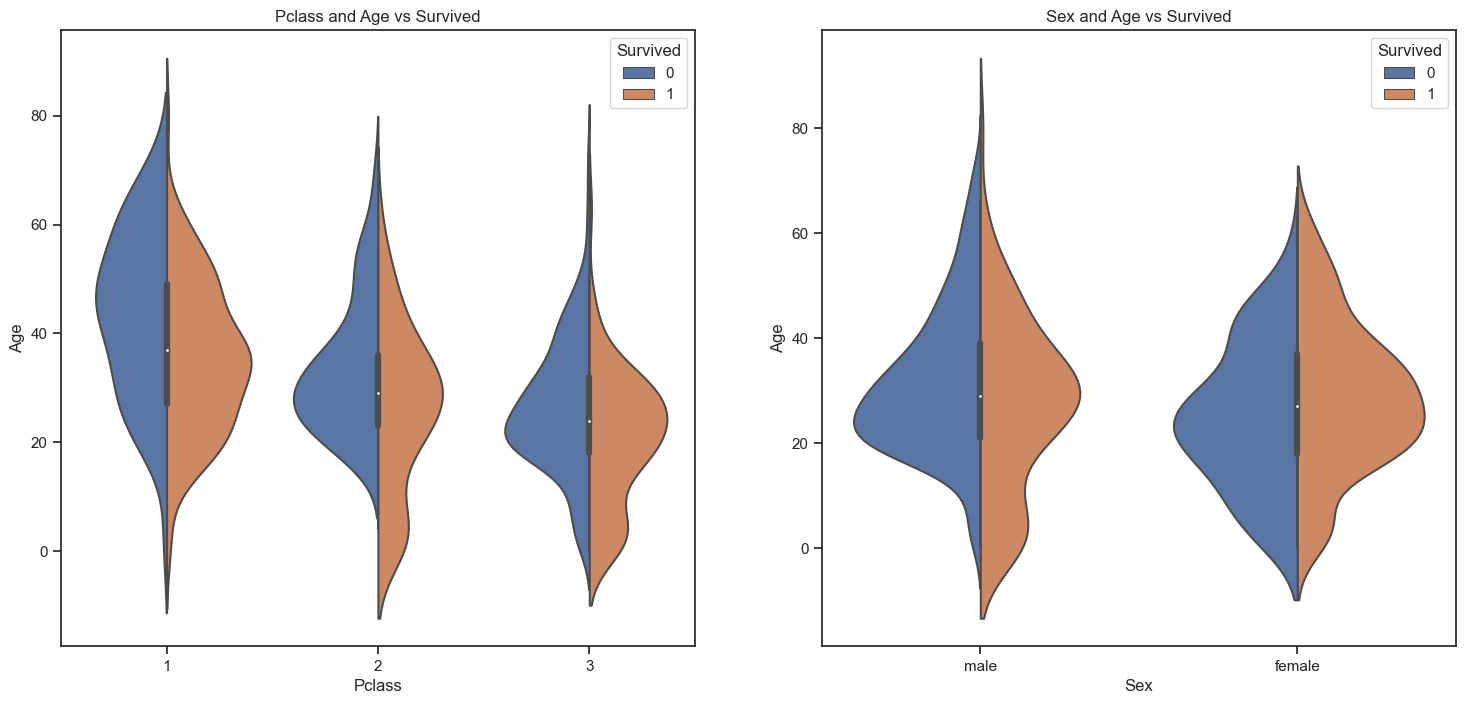

In [26]:
fig,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_age, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')

sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_age, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')

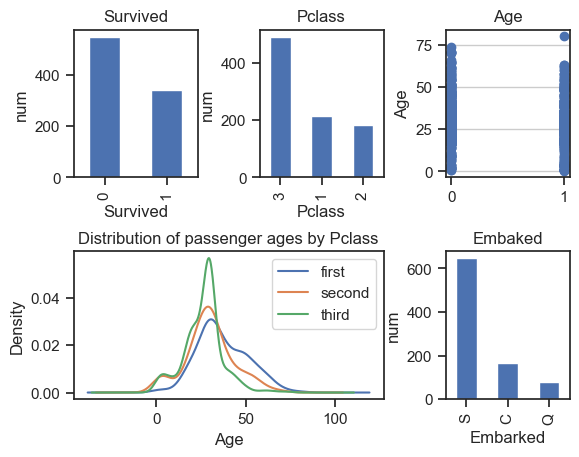

In [27]:
fig=plt.figure()
fig.patch.set_alpha(0.2)

plt.subplot2grid((2,3),(0,0))
train.Survived.value_counts().plot(kind='bar')
plt.title('Survived')
plt.ylabel('num')

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind='bar')
plt.title('Pclass')
plt.ylabel('num')

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived,train.Age)
plt.ylabel('Age')
plt.grid(visible=True,which='major',axis='y')
plt.title('Age')

plt.subplot2grid((2,3),(1,0),colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of passenger ages by Pclass')
plt.legend(('first','second','third'),loc='best')

plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.title('Embaked')
plt.ylabel('num')
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)

plt.show()

# 建立模型（逻辑回归）

In [28]:
train.drop('family_size',axis=1,inplace=True)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [30]:
test['Age'].mean()

30.272590361445783

In [31]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
test.drop('Cabin',axis=1,inplace=True)

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
dataset = pd.concat([train, test], sort=False)#合并后的数据，方便一起清洗

In [36]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
sexdict = {'male':1, 'female':0}
dataset.Sex = dataset.Sex.map(sexdict)

In [38]:
embarked = pd.get_dummies(dataset.Embarked, prefix = 'Embarked')

dataset = pd.concat([dataset,embarked], axis = 1) ## 将编码好的数据添加到原数据上
dataset.drop(['Embarked'], axis = 1, inplace=True) ## 过河拆桥

dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,False,False,True


In [39]:
pclass = pd.get_dummies(dataset.Pclass, prefix = 'Pclass')

dataset = pd.concat([dataset,pclass], axis = 1)
dataset.drop(['Pclass'], axis = 1, inplace=True)

dataset.head(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,False,False,True,False,False,True


In [40]:
dataset['family']=dataset.SibSp+dataset.Parch+1

dataset.head(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,family
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,False,False,True,False,False,True,2


In [41]:
#最后把我觉得没有帮助的列删除
dataset.drop(['Ticket','Name'], axis = 1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Embarked_C   1309 non-null   bool   
 8   Embarked_Q   1309 non-null   bool   
 9   Embarked_S   1309 non-null   bool   
 10  Pclass_1     1309 non-null   bool   
 11  Pclass_2     1309 non-null   bool   
 12  Pclass_3     1309 non-null   bool   
 13  family       1309 non-null   int64  
dtypes: bool(6), float64(3), int64(5)
memory usage: 99.7 KB


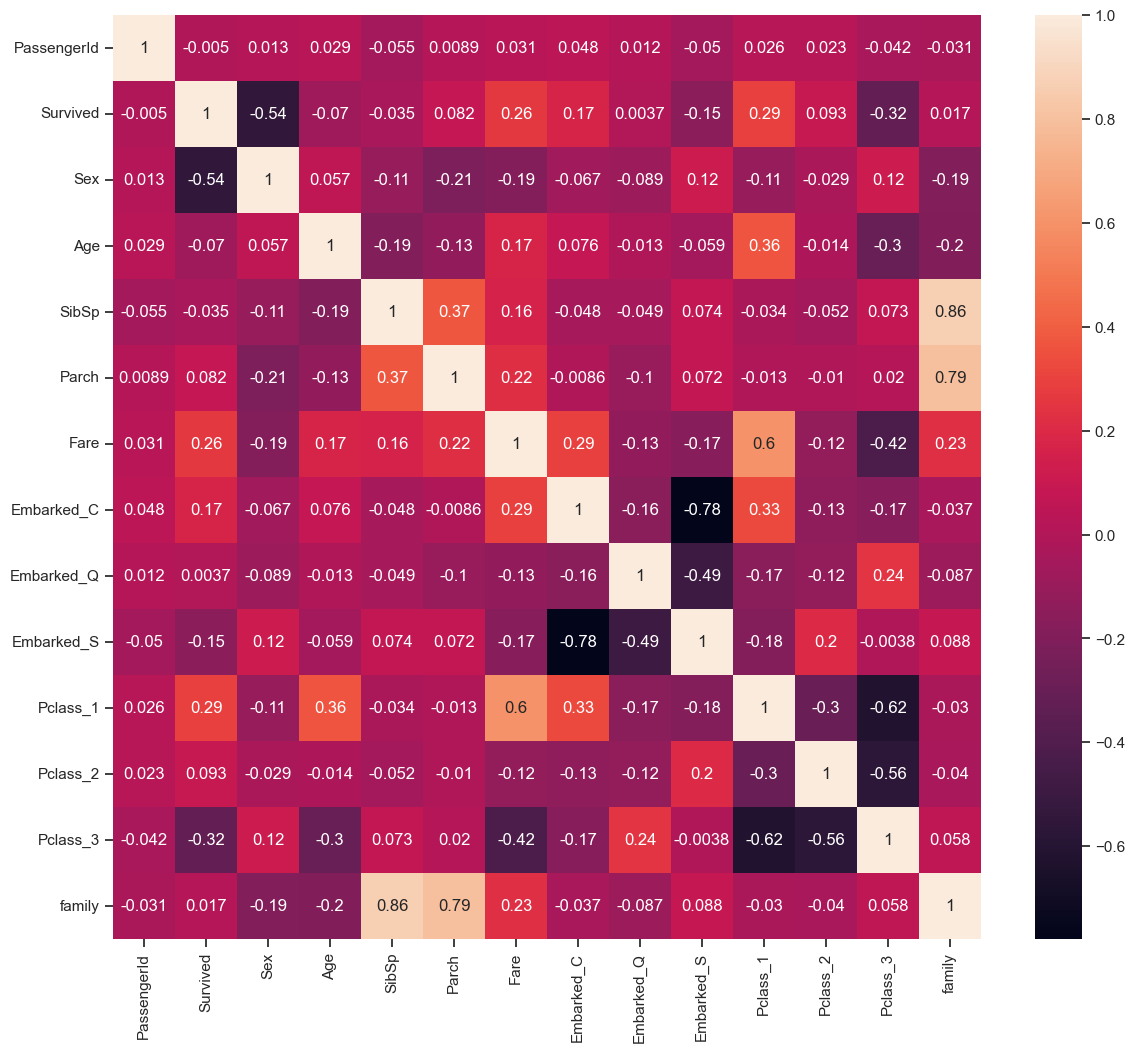

In [42]:
plt.figure(figsize=(14,12))
sns.heatmap(dataset.corr(),annot = True)
plt.show()

# 训练集与测试集

In [43]:
x_train = dataset.iloc[0:891, :]
y_train = x_train.Survived
x_train.drop(['Survived'], axis=1, inplace =True)

x_test = dataset.iloc[891:, :]
x_test.drop(['Survived'], axis=1, inplace =True)

y_test = pd.read_csv('D:/HuaweiMoveData/Users/zero/Desktop/gender_submission.csv')#测试集
y_test=np.squeeze(y_test)

x_train.shape,y_train.shape,x_test.shape, y_test.shape

((891, 13), (891,), (418, 13), (418, 2))

# 建立Logistic Regression模型

In [44]:
import pickle
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression()

model.fit(x_train.iloc[0:-100,:],y_train.iloc[0:-100])
accuracy_score(model.predict(x_train.iloc[-100:,:]),y_train.iloc[-100:].values.reshape(-1,1))

0.82

In [45]:
prediction1 = model.predict(x_test)
result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction1.astype(np.int32)})
result.to_csv("D:/HuaweiMoveData/Users/zero/Desktop/predictions1.csv", index=False)
result.head()
with open('D:/HuaweiMoveData/Users/zero/Desktop/x.pkl','wb')as file:
  pickle.dump(model,file)

In [46]:
accuracy_score(y_test['Survived'], prediction1)

0.9593301435406698

In [47]:
model2 = LogisticRegression()
model2.fit(x_train,y_train)

prediction2 = model2.predict(x_test)
accuracy_score(y_test['Survived'], prediction2)

0.9497607655502392

In [48]:
result = pd.DataFrame({'PassengerId':y_test['PassengerId'].values, 'Survived':prediction2.astype(np.int32)})
result.to_csv("D:/HuaweiMoveData/Users/zero/Desktop/predictions2.csv", index=False)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [49]:
pd.concat((pd.DataFrame(x_train.columns, columns = ['variable']), 
           pd.DataFrame(abs(model.coef_[0]), columns = ['importance'])), 
           axis = 1).sort_values(by='importance', ascending = False)[:15]

,variable,importance
1,Sex,2.669227
9,Pclass_1,1.086351
10,Pclass_2,0.586268
3,SibSp,0.571003
6,Embarked_C,0.559459
11,Pclass_3,0.459680
4,Parch,0.381703
7,Embarked_Q,0.371579
8,Embarked_S,0.281901
12,family,0.260232


In [50]:
from sklearn.model_selection import cross_val_score, train_test_split
cross_val_score(model2, x_train, y_train, cv=5,scoring='accuracy')

array([0.79329609, 0.79775281, 0.78651685, 0.76966292, 0.8258427 ])

In [51]:
pd.concat((pd.DataFrame(x_train.columns, columns = ['variable']), 
           pd.DataFrame(abs(model2.coef_[0]), columns = ['importance'])), 
           axis = 1).sort_values(by='importance', ascending = False)[:15]

,variable,importance
1,Sex,2.618169
9,Pclass_1,1.367881
6,Embarked_C,0.702789
3,SibSp,0.646962
10,Pclass_2,0.582505
11,Pclass_3,0.578522
7,Embarked_Q,0.447823
4,Parch,0.400854
12,family,0.324048
8,Embarked_S,0.221252


In [52]:
lr_param_grid={'C':[0.01,0.1,0.2,1,2,10],'penalty':['l1','l2'],'solver':['liblinear'], 'tol':[1e-6]}

In [53]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(LogisticRegression(),param_grid=lr_param_grid,cv=5,scoring='accuracy')

In [54]:
grid.fit(x_train, y_train)
grid.best_estimator_,grid.best_score_,grid.best_params_

(LogisticRegression(C=1, solver='liblinear', tol=1e-06),
 0.79686774213797,
 {'C': 1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06})

In [55]:
prediction1 = grid.best_estimator_.predict(x_test)
accuracy_score(y_test['Survived'], prediction1)

0.9497607655502392

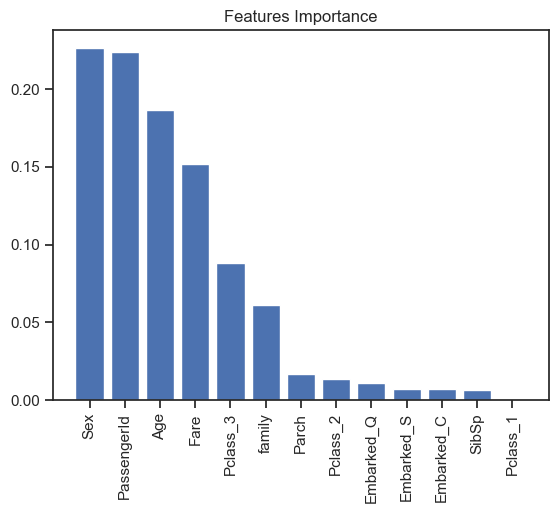

In [57]:
importances = clf.feature_importances_
names = x_train.columns
plt.title('Features Importance')
plt.bar(range(0,len(names)),importances[importances.argsort()[::-1]])
plt.xticks(range(0,len(names)),names[importances.argsort()[::-1]],rotation=90)
plt.show()

In [58]:
print(model2.coef_)
print(x_train.columns)

[[ 8.34331295e-05 -2.61816932e+00 -3.69469156e-02 -6.46962314e-01
  -4.00853637e-01  2.82509361e-03  7.02788868e-01  4.47822743e-01
   2.21252477e-01  1.36788127e+00  5.82505166e-01 -5.78522344e-01
   3.24048137e-01]]
Index(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'family'],
      dtype='object')


In [59]:
min_id = dataset['PassengerId'].min()
max_id = dataset['PassengerId'].max()
print(f"PassengerId can be any integer between {min_id} and {max_id}.")

PassengerId can be any integer between 1 and 1309.
